### Using scikit and matplotlib to get pretty confusion matrices
- This code runs only for SVM model, but can be extended to any of the others ...
- Link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[118   7   2]
 [ 13 144   2]
 [  0   0 142]]


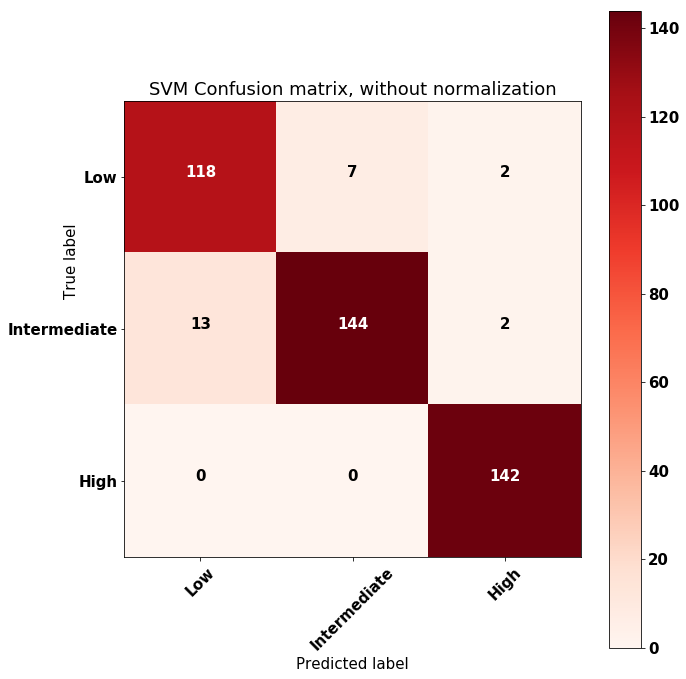

In [35]:
print(__doc__)

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#This sets the font of all items to the font specified by the kwargs object, font
font = {'family' : 'roman',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

#Adapting this code from iris dataset to our data
X = np.load('feat.npy') 
y = np.load('label.npy').ravel() 

class_names = np.array(['Low','Intermediate','High'])

# Fix random seed number
np.random.seed(7)

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#class_names = iris.target_names

# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30) 

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)

# SVM classifier
classifier = SVC(C=200, gamma = 0.0001, kernel='rbf', decision_function_shape="ovr") 
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.1, 0.65)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix (Function call)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='SVM Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      #title='Normalized confusion matrix')

plt.savefig('SVM Confusion Matrix.png', dpi=600)
plt.show()